# Set up

In [185]:
# general imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
import missingno as msno
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, plot_confusion_matrix, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Exploratory Data Analysis and Preprocessing

In [157]:
# read dataset
df = 'https://raw.githubusercontent.com/Manshi99/Job_Change_of_Data_Scientists/main/Dataset'
df = pd.read_csv(df)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
# check features type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
# statistcal description
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## EDA of each variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



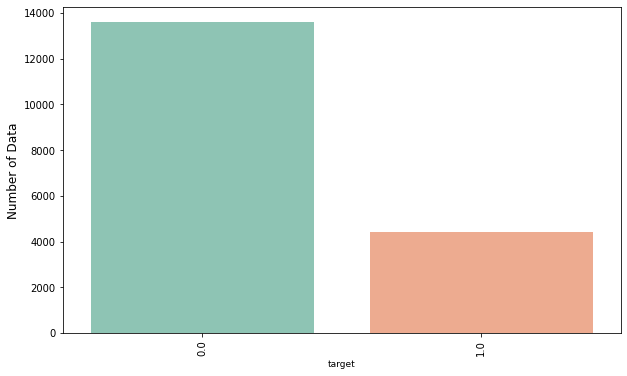

0.0    13593
1.0     4421
Name: target, dtype: int64


In [108]:
# Target
# 0 – Not looking for job change,
# 1 – Looking for a job change
# the number of 1 ( Looking for a job change) < 0 (Not looking for job change)
mnj = df['target'].value_counts()  
plt.figure(figsize=(10,6))
sns.barplot(mnj.index, mnj.values, alpha=0.8, palette='Set2')
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

print(mnj)

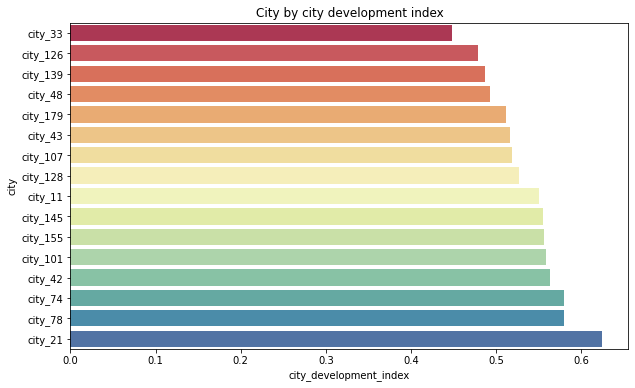

In [59]:
# City to City Development Index
cdi = df.sort_values(by='city_development_index', ascending=True)[:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index, palette='Spectral')
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributional of city_development_index')

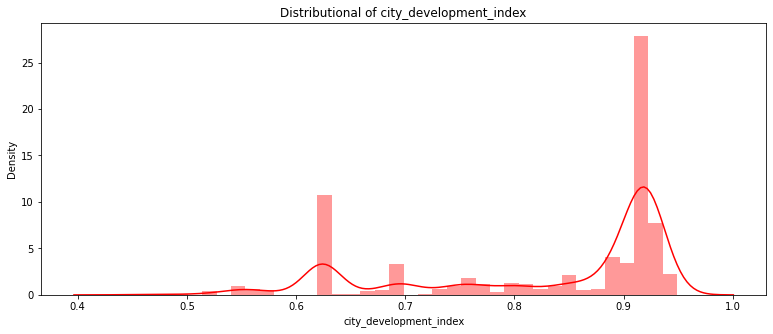

In [60]:
# city_development_index
f, axes = plt.subplots(1,1, figsize = (13, 5))
g1 = sns.distplot(df["city_development_index"], color="red",ax = axes)
plt.title("Distributional of city_development_index")

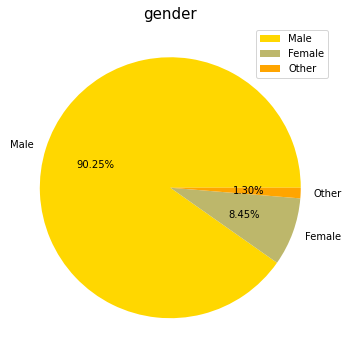

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


In [69]:
# gender 
gender = df["gender"].value_counts()

plt.figure(figsize = (10,6))
plt.pie(gender.values, labels=gender.index, autopct='%1.2f%%',colors=['gold','darkkhaki','orange'])
plt.title('gender',fontsize = 15)
plt.legend()
plt.show()

print(gender)

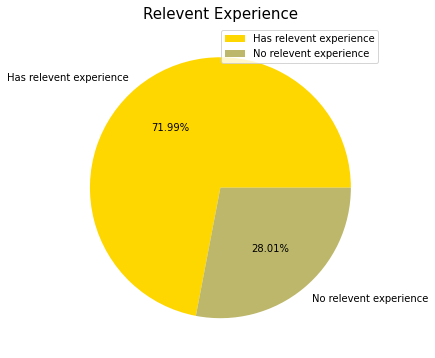

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


In [28]:
# relevent_experience 
experience = df["relevent_experience"].value_counts()

plt.figure(figsize = (10,6))
plt.pie(experience.values, labels=experience.index, autopct='%1.2f%%',colors=['gold','darkkhaki'])
plt.title('Relevent Experience',fontsize = 15)
plt.legend()
plt.show()
print(experience)

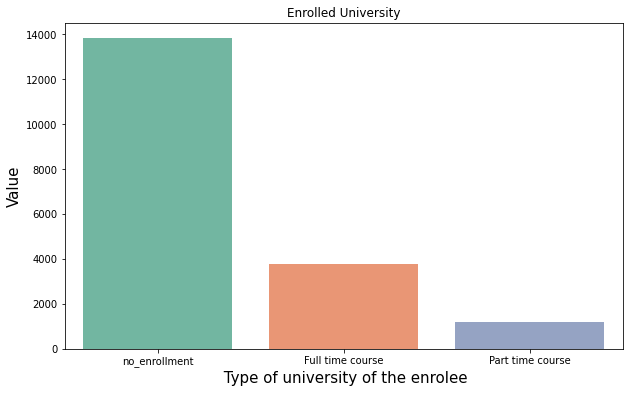

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


In [32]:
# enrolled_university 
university = df["enrolled_university"].value_counts()

plt.figure(figsize=(10,6))
ax= sns.barplot(x=university.index, y=university.values, palette='Set2')
plt.xlabel(' Type of university of the enrolee', size = 15) 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University')
plt.show()
print(university)

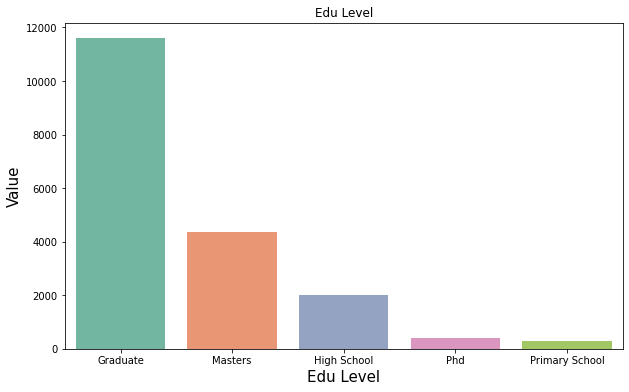

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [38]:
# education_level
plt.figure(figsize=(10,6))
sns.barplot(x=edu_level.index, y=edu_level.values, palette='Set2')
plt.xlabel('Edu Level', size = 15) 
plt.ylabel('Value', size = 15) 
plt.title('Edu Level')
plt.show()

edu_level = df["education_level"].value_counts()
print(edu_level)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


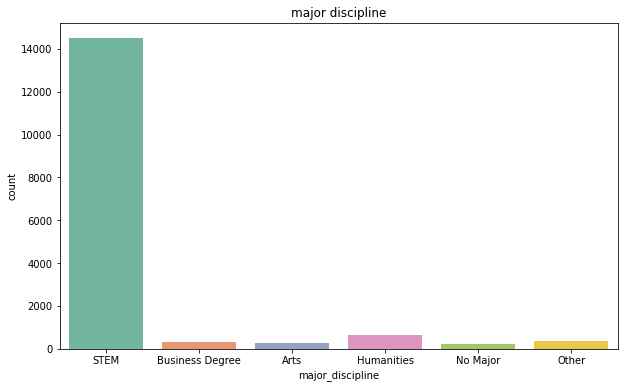

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


In [40]:
# major_discipline
plt.figure(figsize=(10,6))
sns.countplot(df["major_discipline"], palette='Set2')
plt.title("major discipline")
plt.show()

major = df["major_discipline"].value_counts()
print(major)

In [82]:
# experience
ep = df['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(df)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=700,
    height=500 
)

fig.show()

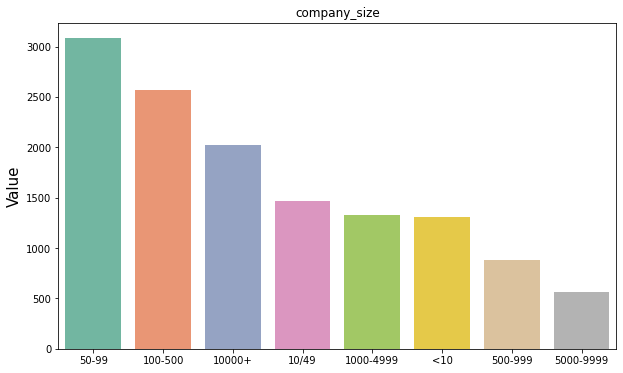

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


In [49]:
# company_size
plt.figure(figsize=(10,6))
company_size = df["company_size"].value_counts()
sns.barplot(x=company_size.index, y=company_size.values, palette='Set2')
plt.ylabel('Value', size = 15) 
plt.title('company_size')
plt.show()

print(company_size)

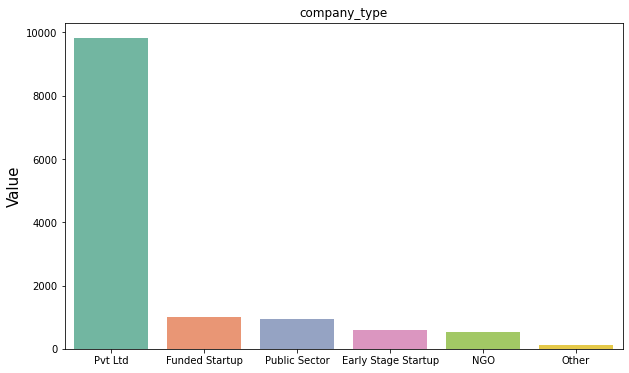

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64


In [67]:
# company_type
plt.figure(figsize=(10,6))
company_type = df["company_type"].value_counts()
sns.barplot(x=company_type.index, y=company_type.values, palette='Set2')
plt.ylabel('Value', size = 15) 
plt.title('company_type')
plt.show()

company_type = df["company_type"].value_counts()
print(company_type)

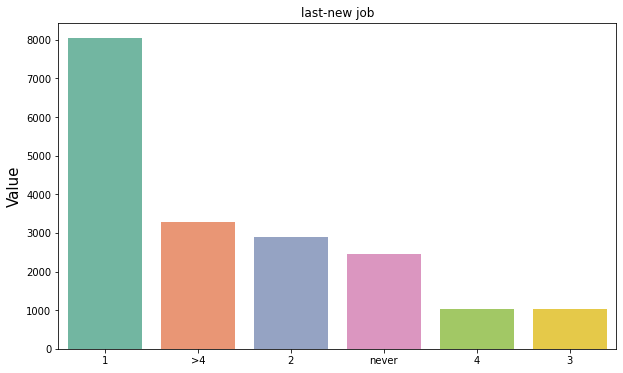

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


In [51]:
# last_new_job 
last_new = df["last_new_job"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=last_new.index, y=last_new.values, palette='Set2')
plt.ylabel('Value', size = 15) 
plt.title('last-new job')
plt.show()

print(last_new)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


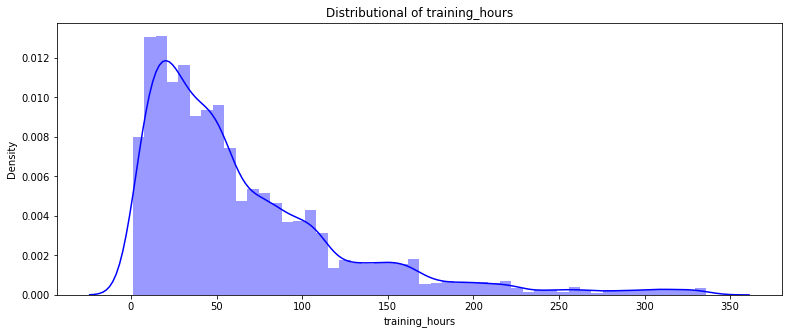

In [62]:
# training_hours 
f, axes = plt.subplots(1,1, figsize = (13,5))
g1 = sns.distplot(df["training_hours"], color="blue",ax = axes)
plt.title("Distributional of training_hours")
plt.show()

### Showing the frequency of each category separated by label (target)

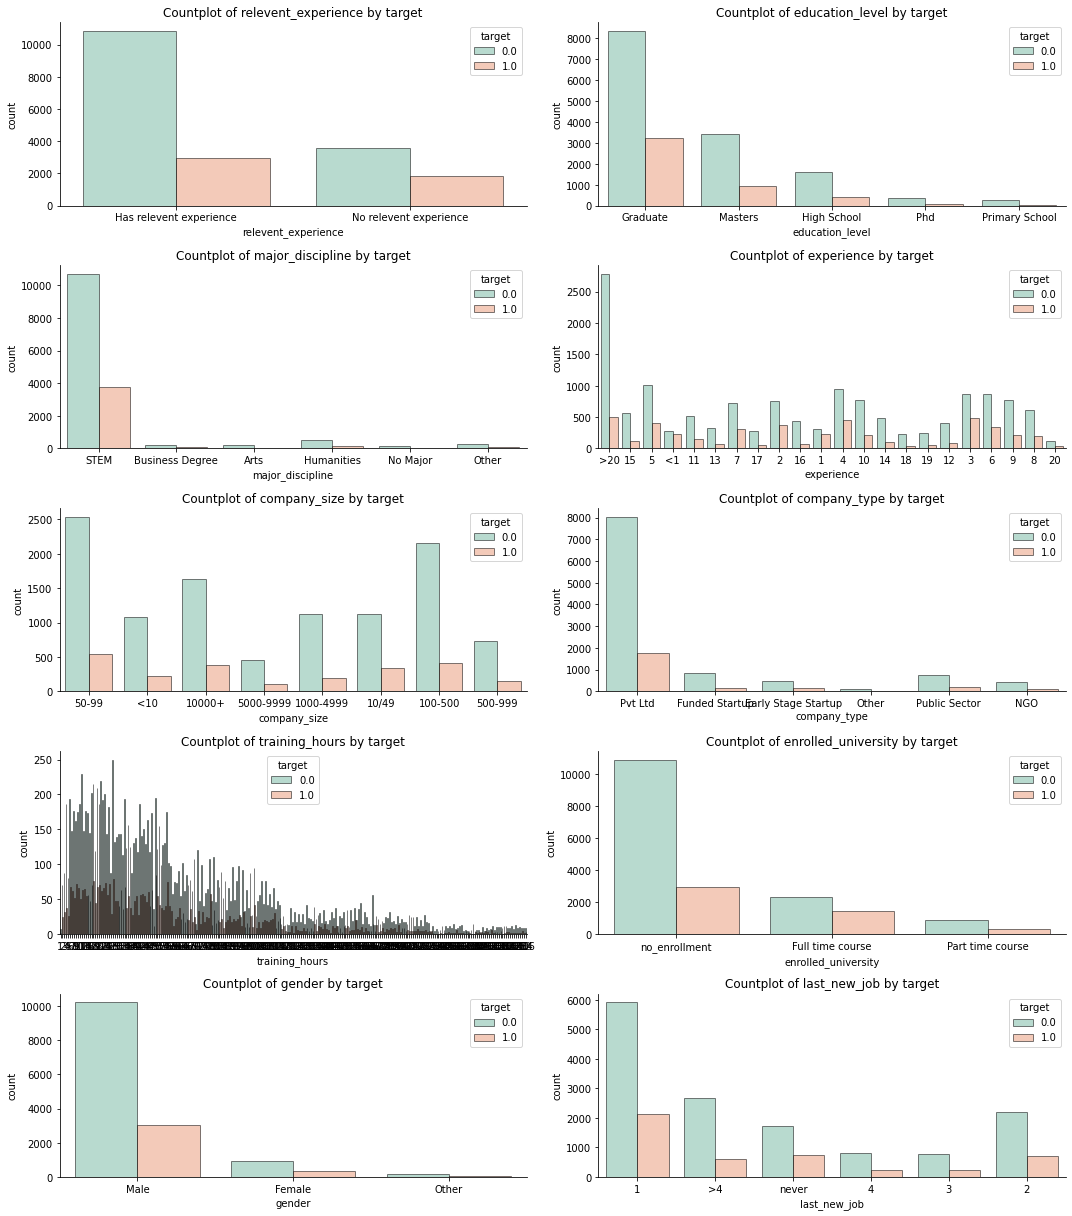

In [76]:
#Countplots showing the frequency of each category with respect to target
plt.figure(figsize=[15,17])
plot=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours",'enrolled_university','gender','last_new_job']
n=1
for f in plot:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.5, data=df, palette='Set2')
    sns.despine()
    plt.title("Countplot of {} by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## Check and deal with missing values

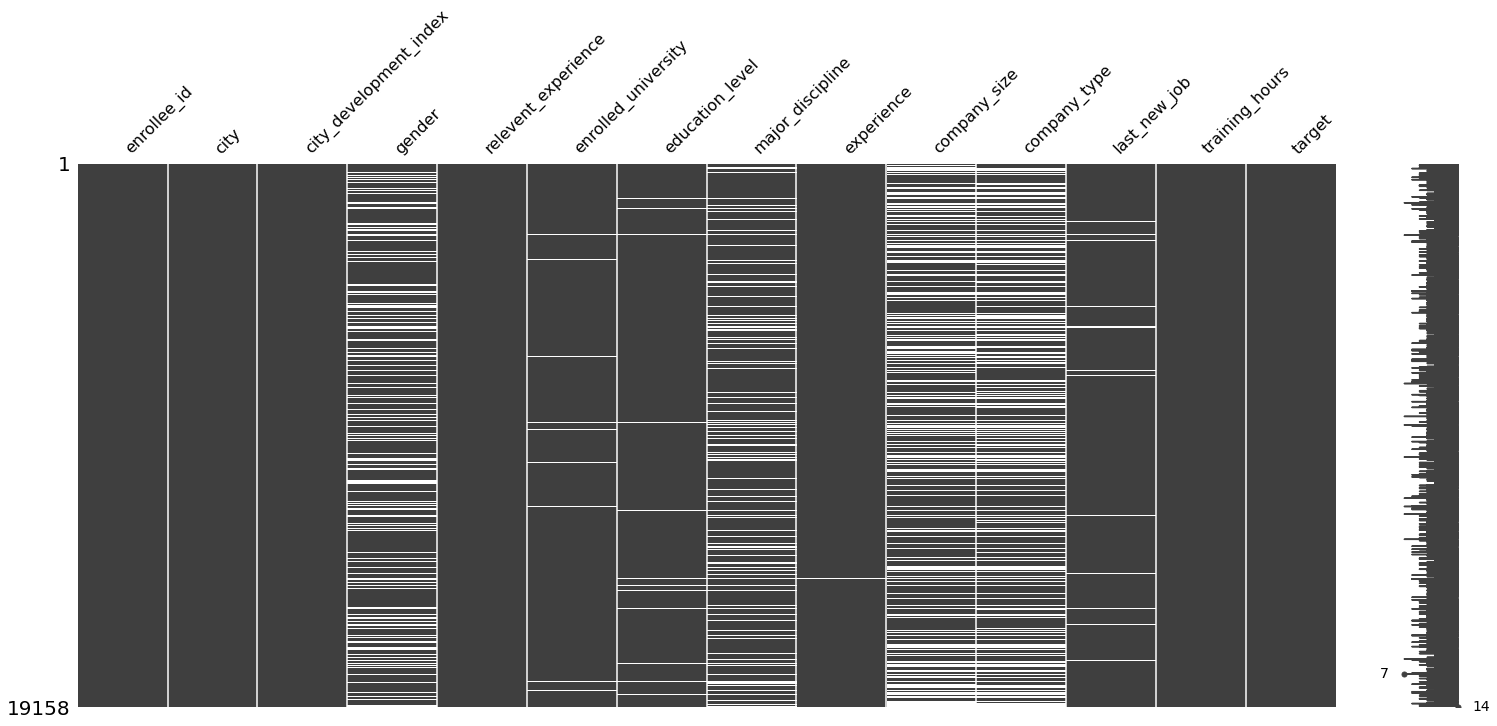

In [8]:
# checking NAs by plot to get a better idea of the dataset
msno.matrix(df)

In [88]:
# check check the proportion of NAs in each column
df.isna().sum()/len(df)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [158]:
# delete null that is too little in the dataset to be ignored
df.dropna(subset=["experience"], inplace=True)
df.dropna(subset=["enrolled_university"], inplace=True)
df.dropna(subset=["last_new_job"], inplace=True)
df.dropna(subset=["education_level"], inplace=True)

In [159]:
# fill the null in other columns by Unknown
df["major_discipline"].fillna('Unknown', inplace = True)
df["company_size"].fillna('Unknown', inplace = True)
df["company_type"].fillna('Unknown', inplace = True)
df["gender"].fillna('Unknown', inplace = True)

In [160]:
# check the NA again
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  object 
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  object 
 4   relevent_experience     18014 non-null  object 
 5   enrolled_university     18014 non-null  object 
 6   education_level         18014 non-null  object 
 7   major_discipline        18014 non-null  object 
 8   experience              18014 non-null  object 
 9   company_size            18014 non-null  object 
 10  company_type            18014 non-null  object 
 11  last_new_job            18014 non-null  object 
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Handling categorical variables

In [161]:
# gender
# male = 0 , female = 1, other = 2
df["gender"] = [ 0 if gender == "Male"
                        else 1 if gender == "Female"
                        else 2 for gender in df["gender"]]

In [162]:
# company size
df["company_size"] = [ 0 if (i == "1-9")|(i == '10-49')|(i == '50-99')
                      else 1 if (i == '100-500')|(i == '500-999')|(i == '1000-4999')
                      else 2 for i in df["company_size"]]

In [163]:
#relevent_experience
# Has relevent experience = 0 , No relevent experience = 1
df["relevent_experience"] = [ 0 if i == "Has relevent experience"
                                    else 1 for i in df["relevent_experience"]]

In [164]:
#enrolled_university 
# no_enrollment = 0 , Full time course = 1, Part time course = 2

df["enrolled_university"] = [ 0 if i == "no_enrollment"
                                    else 1 if i == "Full time course"
                                    else 2 for i in df["enrolled_university"]]

In [165]:
#education_level
# Graduate = 0 , Masters = 1, High School = 2, Phd = 3, Primary School = 4 

df["education_level"] = [ 0 if i == "Graduate"
                                    else 1 if i == "Masters"
                                    else 2 if i == "High School"
                                    else 3 if i == "Phd" 
                                    else 4 for i in df["education_level"]]

In [166]:
#major_discipline 
# STEM  = 0 , Humanities = 1, Business Degree = 2, Arts = 3, No Major = 4, Other = 5 

df["major_discipline"] = [ 0 if i == "STEM"
                                    else 1 if i == "Humanities"
                                    else 2 if i == "Business Degree"
                                    else 3 if i == "Arts" 
                                    else 4 if i == "No Major" 
                                    else 5 for i in df["major_discipline"]]

In [167]:
#experience
df["experience"] = [ 0 if i == "2" or i == "1" or i == "4" or i == "<1" or i == "3"
                                    else 1 if i == "5>" or i == "11" or i == "7" or i == "10" or i == "6" or i == "9" or i == "8" or i == "20"
                                    else 2 for i in df["experience"]]

In [168]:
#company_type
# pvt ltd = 0, Funded Startup  = 1 , Public Sector  = 2, Early Stage Startup = 3, NGO = 4 , else 5 

df["company_type"] = [ 0 if i == "Pvt Ltd"
                               else 1 if i == "Funded Startup"
                               else 2 if i == "Public Sector"
                               else 3 if i == "Early Stage Startup"
                               else 4 if i == "NGO" 
                               else 5 for i in df["company_type"]]

In [169]:
#last_new_job
df["last_new_job"] = [ 0 if i == "1"
                               else 1 if i == "2"
                               else 2 if i == "3"
                               else 3 if i == "4"
                               else 4 if i == "never" 
                               else 5 for i in df["last_new_job"]]

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  object 
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  int64  
 4   relevent_experience     18014 non-null  int64  
 5   enrolled_university     18014 non-null  int64  
 6   education_level         18014 non-null  int64  
 7   major_discipline        18014 non-null  int64  
 8   experience              18014 non-null  int64  
 9   company_size            18014 non-null  int64  
 10  company_type            18014 non-null  int64  
 11  last_new_job            18014 non-null  int64  
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(2), int64(11), object(1)
me

# Machine Leaning Models

## Spliting dataset

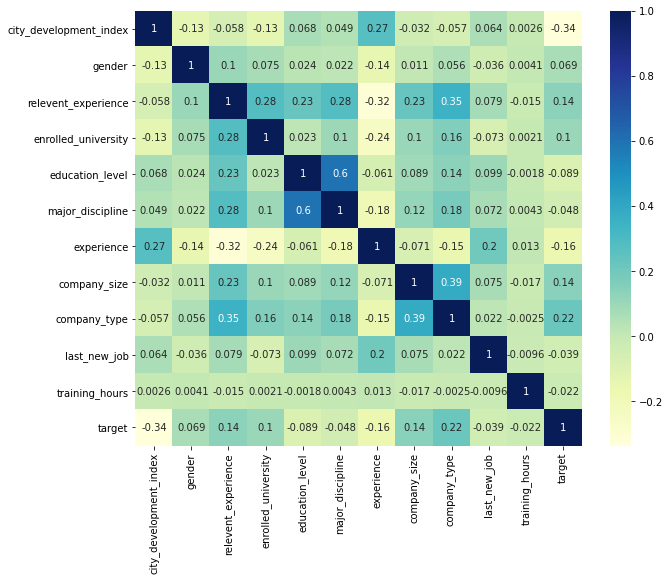

In [189]:
# check the correlation of variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='YlGnBu')

In [190]:
# construct the data for modeling
df_model = df.drop(['enrollee_id','city','education_level'],axis=1)

In [191]:
# dependent and independent variables
y = df_model['target']
X = df_model.drop(['target'],axis=1)

In [192]:
# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# 80 % training dataset and 20 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [193]:
# model accuracy
result = []

## Logistic regression

In [194]:
# creating a RF classifier
lr_model = LogisticRegression(solver='newton-cg',class_weight='balanced')

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
lr_model.fit(X_train,y_train)

# performing predictions on the test dataset
y_pred = lr_model.predict(X_test)

# using metrics module for accuracy calculation
acc_log_reg = accuracy_score(y_test, y_pred)
result.append(acc_log_reg)
print("Logistic Regression Model Acc : ", acc_log_reg)

Logistic Regression Model Acc :  0.7299472661670829


## Random forest

In [195]:
random_forest_model = RandomForestClassifier(max_depth=7, random_state= 59)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)
print("Random Forest Model Acc : ",acc_random_forest)

Random Forest Model Acc :  0.7849014709963918


## KNN

In [196]:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_knn = clf.predict(X_test)
cm_random_knn = confusion_matrix(y_pred_knn, y_test)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
result.append(acc_random_knn)
print("KNN Model Acc : ",acc_random_knn)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   26.7s finished


KNN Model Acc :  0.7507632528448515


## SVM

In [197]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
result.append(acc_svm)
print("SVM Model Acc : ",acc_svm)

SVM Model Acc :  0.7477102414654455


## Results Comparsion

In [204]:
# compare the results
results = pd.DataFrame({"Model Result":result, 
                        "Models":["Logistic Regression",
                                  "Random Forest",
                                  "KNN", 
                                  "SVM"]
                                  })
results

,Model Result,Models
0,0.729947,Logistic Regression
1,0.784901,Random Forest
2,0.750763,KNN
3,0.747710,SVM


## Important Features


Text(0.5, 1.0, 'VarImp Plot')

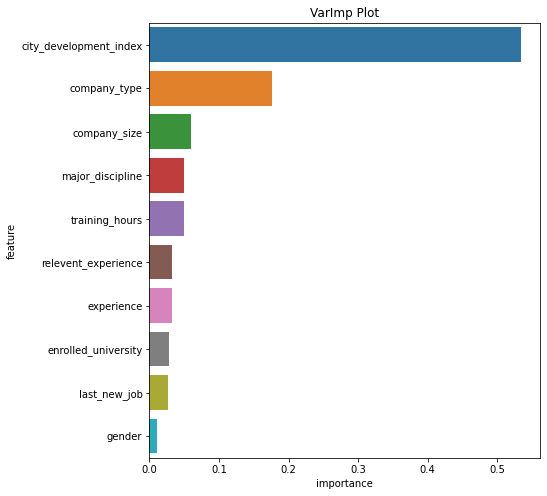

In [206]:
feature_names = list(X.columns)
feature_imp = pd.Series(random_forest_model.feature_importances_, index=feature_names).sort_values(ascending = False)
tmp = feature_imp.to_frame().reset_index().rename(columns={'index':'feature',0:'importance'})

plt.figure(figsize=(7,8))
sns.barplot(data = tmp, y = 'feature', x = 'importance')
plt.title('VarImp Plot')